In [3]:
#Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [6]:
train = pd.read_csv('./dataset/train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.shape

(891, 12)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

(0, 890)

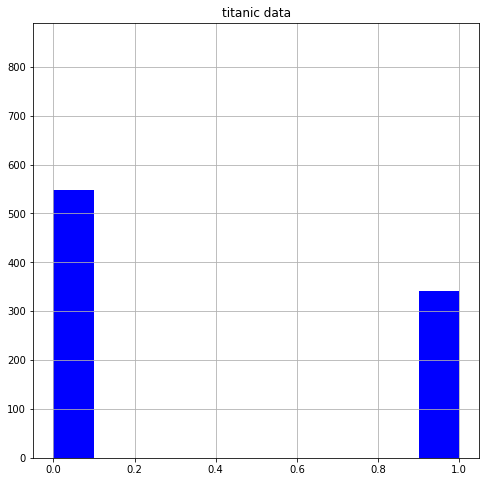

In [15]:
plt.title('titanic data')
train['Survived'].hist(figsize=(8,8),color="blue")
plt.ylim(0,890)

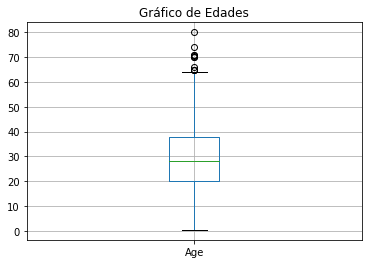

In [16]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Edades')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
train.boxplot(column='Age')

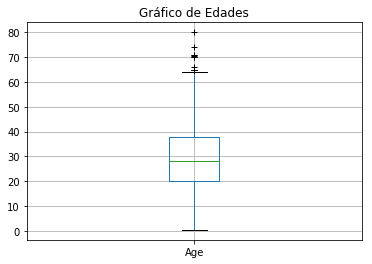

In [17]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Edades')
train.boxplot(column='Age',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [18]:
# Tabla de Contingencia para la Variable Loan_Status
import numpy as np
import pandas as pd
import os

In [20]:
my_tab = pd.crosstab(train["Survived"],columns="count",normalize='all')
my_tab

col_0,count
Survived,
0,0.616162
1,0.383838


In [21]:
#Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
    return sum(x.isnull())

In [36]:
#Aplicamos por columna:
print("Valores perdidos por columna")
print(train.apply(num_missing, axis=0))

Valores perdidos por columna
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [33]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object'),
 dtype('float64'): Index(['Age', 'Fare'], dtype='object'),
 dtype('O'): Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object')}

In [39]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train['Sex'] = train['Sex'].replace({'female': 1,'male': 2})
#train['Embarked'] = train['Embarked'].replace({'S': 1,'C': 2, 'Q':3})
#train['Sex']
train.Embarked.unique() 
#array(['S', 'C', 'Q', nan], dtype=object)

array([  1.,   2.,   3.,  nan])

In [57]:
test = pd.read_csv('./dataset/test_t.csv')

In [58]:
test['Sex'] = test['Sex'].replace({'female': 1,'male': 2})
test['Embarked'] = test['Embarked'].replace({'S': 1,'C': 2, 'Q':3})

In [59]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head()
train_parametrica.Embarked.unique()

array([  1.,   2.,   3.,  nan])

In [60]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas
for column in ['Age']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())    

In [61]:
train_parametrica.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.647587,29.361582,0.523008,0.381594,32.204208,1.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,2.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [62]:
train_parametrica.shape

(891, 12)

In [63]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [64]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [65]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [66]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])

    
# Imputamos por las moda todas las variables cuantitativas
for column in ['Age']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [67]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [68]:
train_no_parametrica=train.copy()
train_no_parametrica.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0


In [70]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_no_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [72]:
# Le quitamos la variable Loan_ID
train_no_parametrica = train_no_parametrica.drop('PassengerId', axis=1)
train_no_parametrica.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,1.0


In [74]:
!pip install xgboost
from xgboost import XGBClassifier

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [75]:
train_no_parametrica.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0


In [76]:
train_no_parametrica['Sex'] = train_no_parametrica['Sex'].replace({'female': 1,'male': 2})
train_no_parametrica['Embarked'] = train_no_parametrica['Embarked'].replace({'S': 1,'C': 2, 'Q':3})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [80]:
# Imputación meiante ML
# Imputación mediante XGBoost
#from xgboost import XGBClassifier
for column in ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked','Age']:
    df_input = train_no_parametrica[train_no_parametrica[column].notnull()]
    xgb = XGBClassifier()
    xgb.fit(df_input.drop(column, axis=1), df_input[column])
    y_pred = xgb.predict(train_no_parametrica.drop(column, axis=1))
    nulls = train_no_parametrica[train_no_parametrica[column].isnull()]
    for ni in nulls.index:
        train_no_parametrica.loc[ni, column] = y_pred[ni]

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Name, Ticket, Cabin

In [79]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_no_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [82]:
train_parametrica.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,B96 B98,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,B96 B98,1.0


In [83]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

In [86]:
#Creamos nuevas variables a partir de cortes que obtenemos del árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
feature_cols = ['Survived']
X_train=train_parametrica[feature_cols] # Ponemos la variable independiente o feature para poder ver cortes.
Y_train=train_parametrica[['Embarked']] # Ponemos la variable dependiente.
treeclf = DecisionTreeClassifier(max_depth=1, random_state=1) # Acá definimos los parámetros del árbol
treeclf.fit(X_train, Y_train)  # Ajusto un algoritmo sobre unas covariables y una vd
export_graphviz(treeclf, out_file='Recod_ApplicantIncome02.dot', feature_names=feature_cols)

In [88]:
!pip install graphviz 
import graphviz

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [93]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
Survived_Recod = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in train_parametrica['Survived']:
    # Si el registro es menor al valor ,
    if row <0.5:
        # Recodificar la variable con 1
        Survived_Recod.append(1)
     
    else: # Sino
        # Recodificar la variable con 2
        Survived_Recod.append(2)
        
# Create a column from the list
train_parametrica['Survived_Recod'] = Survived_Recod

In [95]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
Survived_Recod = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in test_parametrica['Survived']:
    # Si el registro es menor al valor ,
    if row <0.5:
        # Recodificar la variable con 1
        Survived_Recod.append(1)
     
    else: # Sino
        # Recodificar la variable con 2
        Survived_Recod.append(2)
        
# Create a column from the list
test_parametrica['Survived_Recod'] = Survived_Recod

In [96]:
train_parametrica.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Recod
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,B96 B98,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,2


In [99]:
# Le quitamos la variable PassengerID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('PassengerId', axis=1)
train_parametrica.shape

(891, 12)

In [100]:
###############################################
###### Acá hice el cambio en el código ########
###############################################
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Embarked', axis=1), train_parametrica['Embarked'], test_size=0.30,
                                                   random_state=100)

In [101]:
# EL train y test lo concateno para poder mantener el mismo formato y codigo
train_parametrica = pd.concat([X_train, y_train], axis=1)

In [103]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_parametrica.Embarked.value_counts()

1.0    458
2.0    113
3.0     52
Name: Embarked, dtype: int64